## Task 1: Preprocess and Explore the Data

### Step 1: Data Extraction and Initial Cleaning

Data Overview:
                                TSLA        BND         SPY
Date                                                       
2015-07-01 00:00:00-04:00  17.943333  60.816746  174.917114
2015-07-02 00:00:00-04:00  18.667999  60.967110  174.756912
2015-07-06 00:00:00-04:00  18.648001  61.177582  174.259598
2015-07-07 00:00:00-04:00  17.858667  61.237705  175.355423
2015-07-08 00:00:00-04:00  16.997334  61.410648  172.413467

Missing values per asset:
TSLA    0
BND     0
SPY     0
dtype: int64

Descriptive statistics:
              TSLA          BND          SPY
count  2535.000000  2535.000000  2535.000000
mean    131.963002    68.469189   334.193733
std     120.914904     4.554601   126.427704
min       9.578000    60.779152   155.869751
25%      18.967667    64.654339   230.083199
50%      94.571335    67.604828   305.264404
75%     236.761665    71.891136   420.350494
max     479.859985    77.318253   637.099976


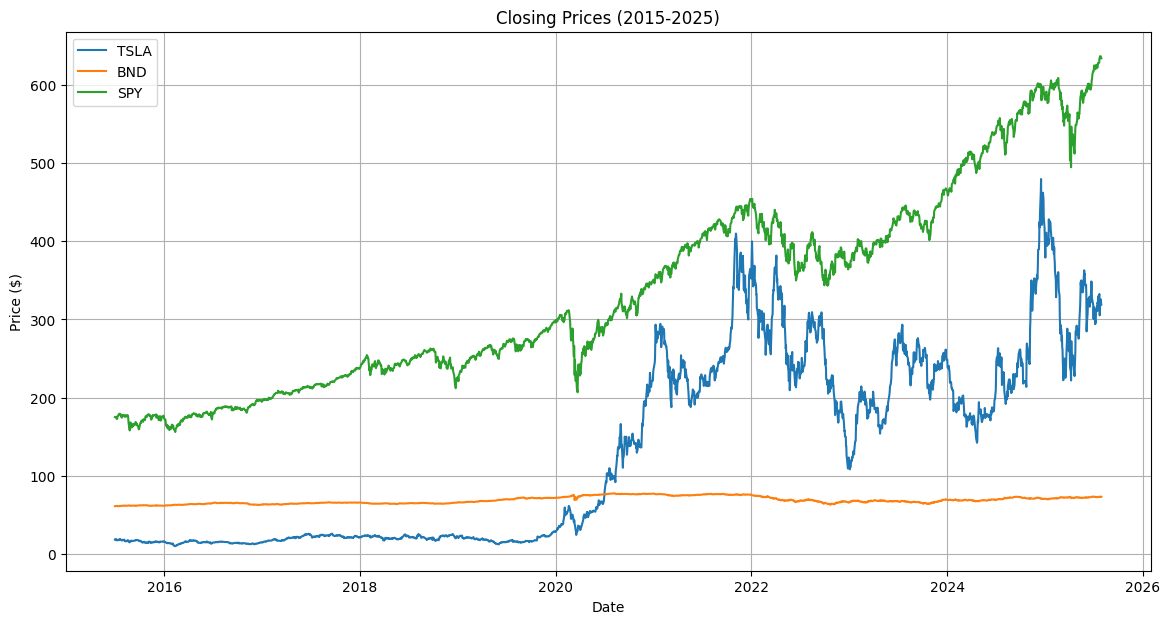

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to safely download stock data
def get_stock_data(ticker, start_date, end_date):
    try:
        stock = yf.Ticker(ticker)
        hist = stock.history(start=start_date, end=end_date)
        return hist['Close']  # Use 'Close' if 'Adj Close' fails
    except Exception as e:
        print(f"Error downloading {ticker}: {e}")
        return None

# Fetch historical data for each ticker
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-07-01'
end_date = '2025-07-31'

# Create empty DataFrame to store closing prices
closing_prices = pd.DataFrame()

for ticker in tickers:
    prices = get_stock_data(ticker, start_date, end_date)
    if prices is not None:
        closing_prices[ticker] = prices

# Check if we got data
if closing_prices.empty:
    raise ValueError("Failed to download any data. Please check your internet connection and try again.")

# Handle missing data
closing_prices.ffill(inplace=True)  # Forward fill
closing_prices.bfill(inplace=True)  # Backward fill if needed

# Basic statistics
print("Data Overview:")
print(closing_prices.head())
print("\nMissing values per asset:")
print(closing_prices.isnull().sum())
print("\nDescriptive statistics:")
print(closing_prices.describe())

# Plot the data
plt.figure(figsize=(14, 7))
for ticker in closing_prices.columns:
    plt.plot(closing_prices.index, closing_prices[ticker], label=ticker)
plt.title('Closing Prices (2015-2025)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

### Step 2: Exploratory Data Analysis (EDA)

C:\Users\gagur\AppData\Local\Temp\ipykernel_25768\2827855971.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  3 of 3 completed


Data columns structure:
MultiIndex([( 'Close',  'BND'),
            ( 'Close',  'SPY'),
            ( 'Close', 'TSLA'),
            (  'High',  'BND'),
            (  'High',  'SPY'),
            (  'High', 'TSLA'),
            (   'Low',  'BND'),
            (   'Low',  'SPY'),
            (   'Low', 'TSLA'),
            (  'Open',  'BND'),
            (  'Open',  'SPY'),
            (  'Open', 'TSLA'),
            ('Volume',  'BND'),
            ('Volume',  'SPY'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])


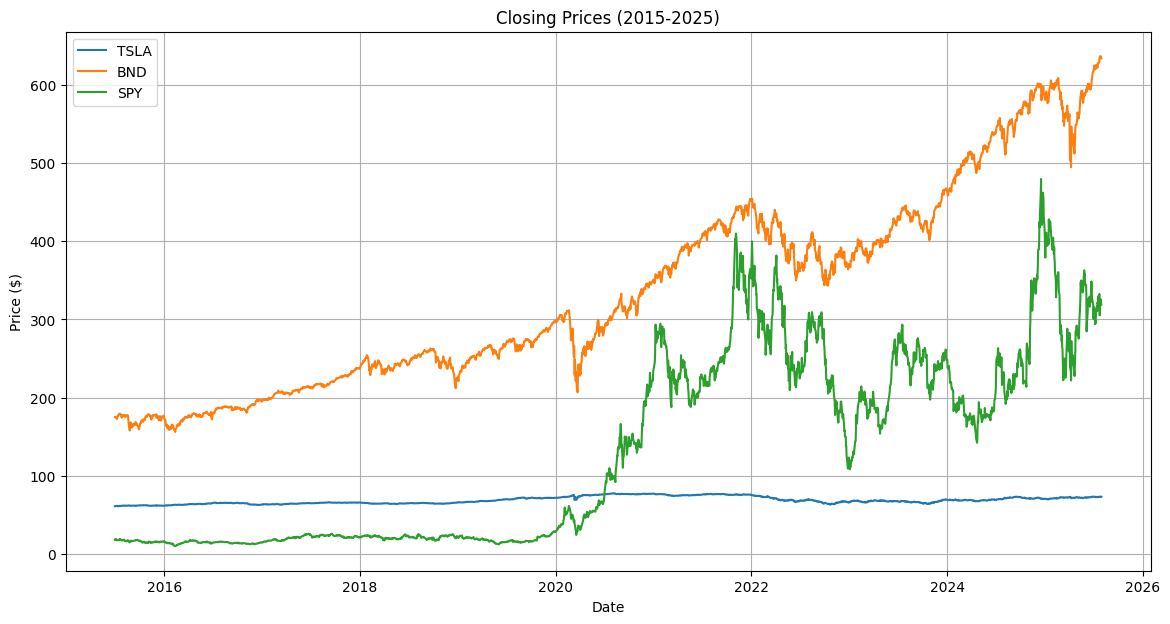

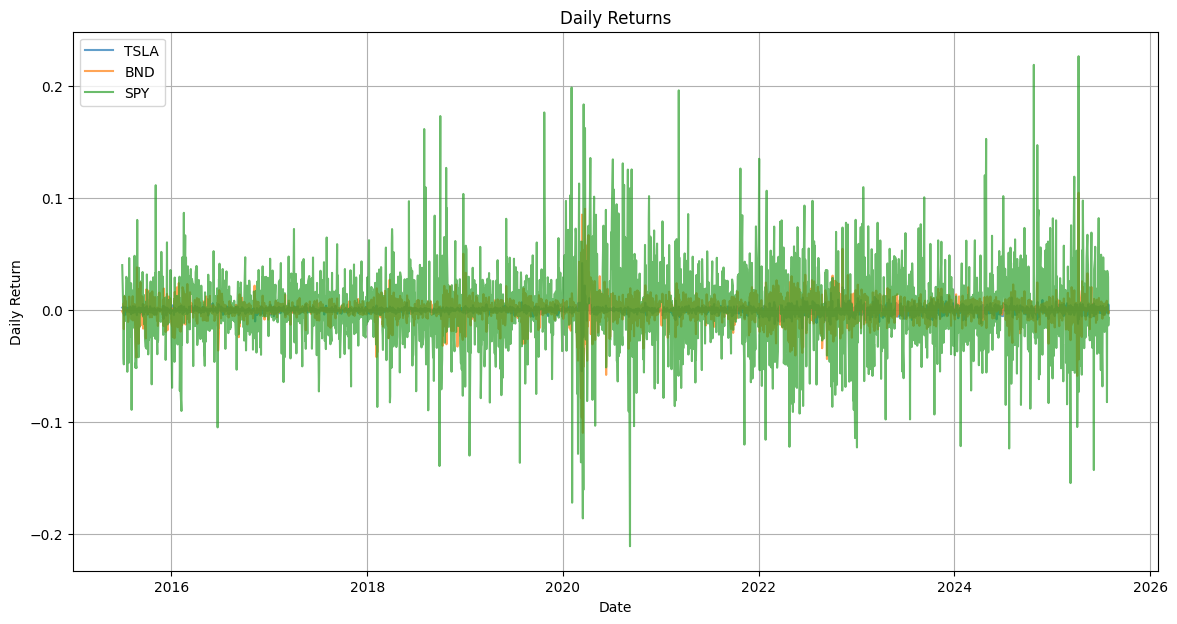

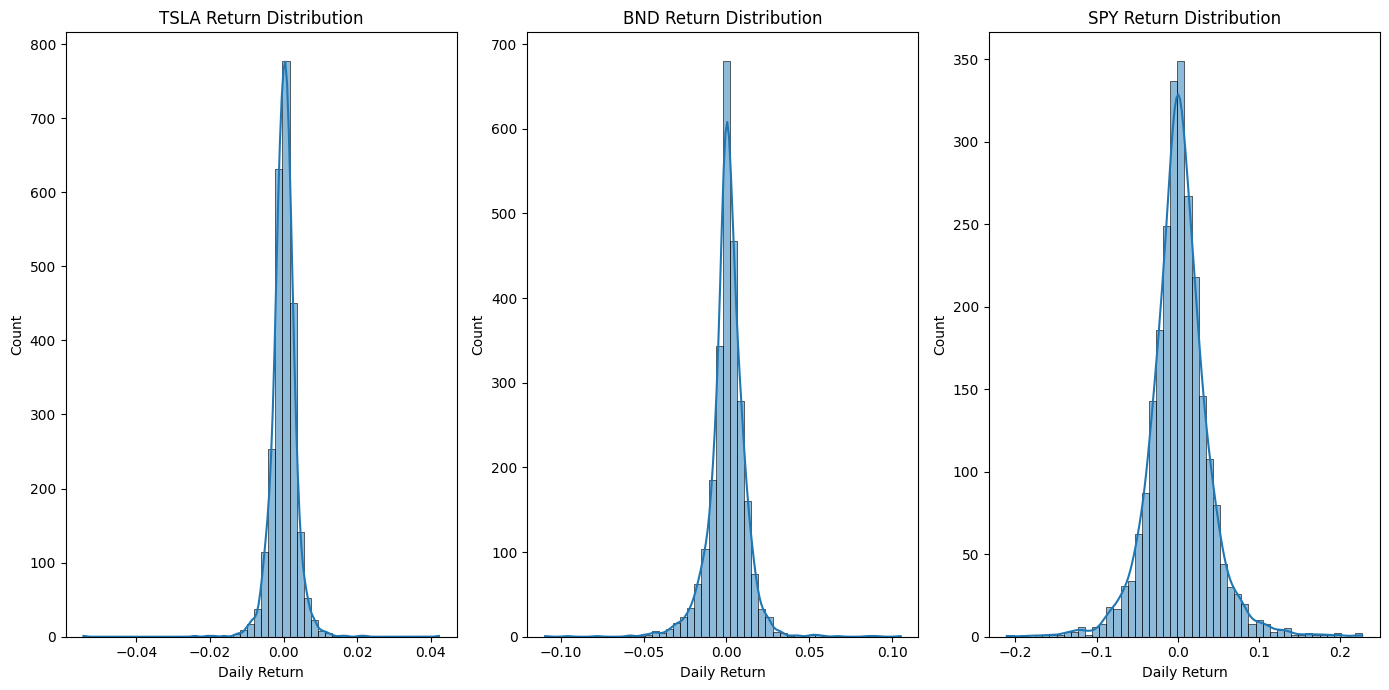

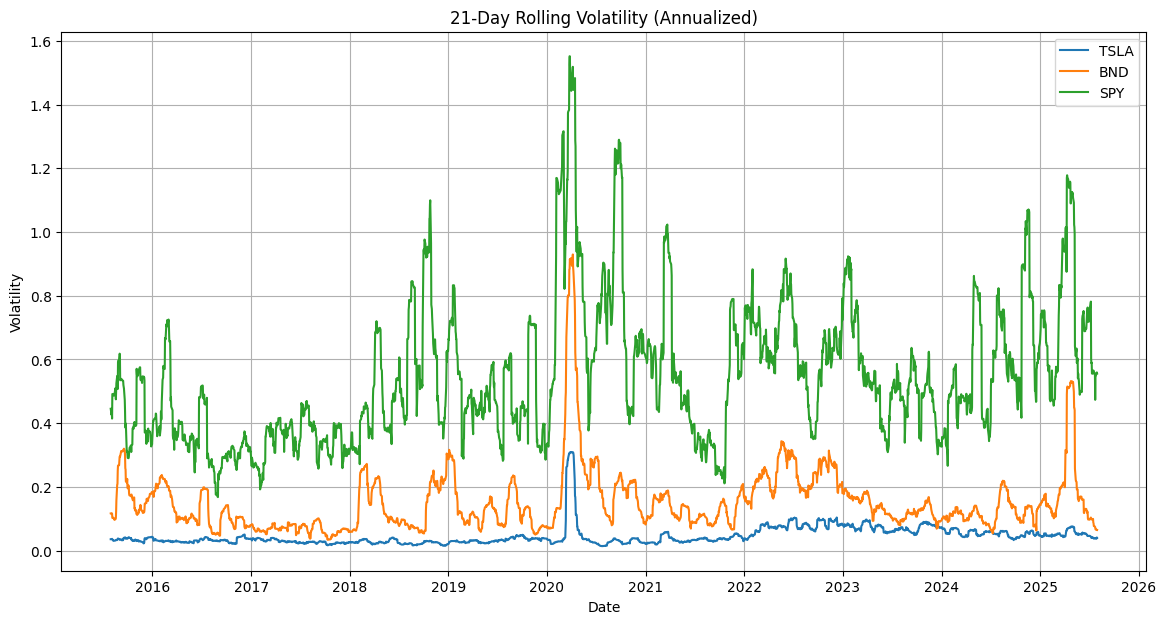

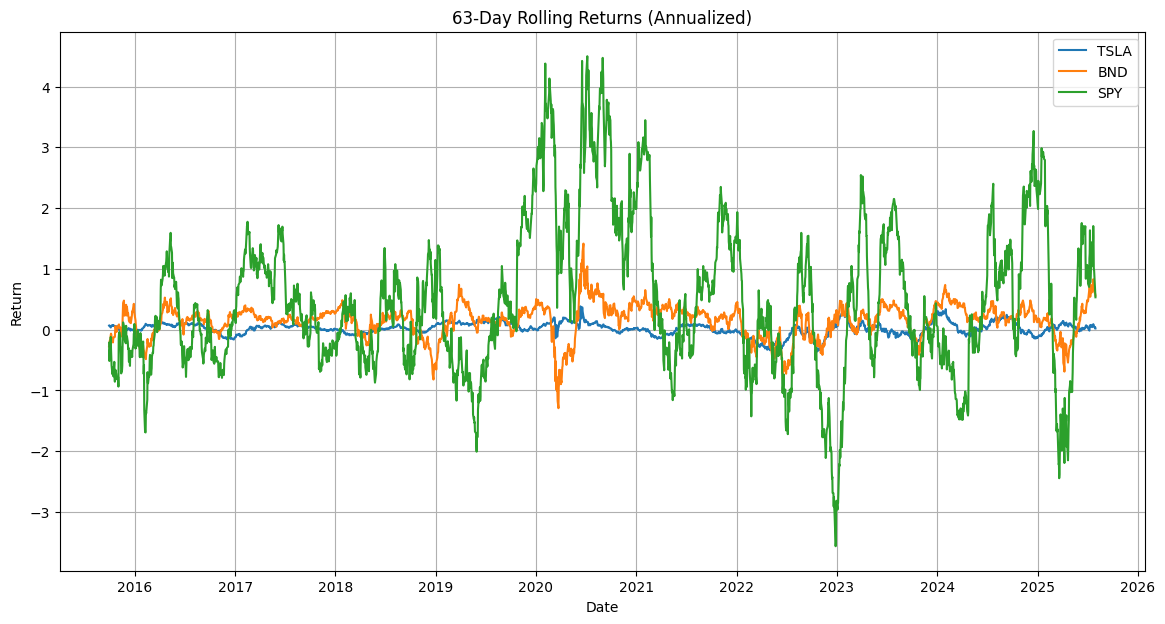

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Fetch historical data - updated approach
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-07-01'
end_date = '2025-07-31'

# Download all data
data = yf.download(tickers, start=start_date, end=end_date)

# Check the structure of the downloaded data
print("Data columns structure:")
print(data.columns)

# Extract closing prices - handles MultiIndex properly
if isinstance(data.columns, pd.MultiIndex):
    # New yfinance format with MultiIndex
    closing_prices = data['Close'].copy()
    closing_prices.columns = tickers  # Simplify column names
else:
    # Old format
    closing_prices = data[[f'{ticker}.Close' for ticker in tickers]].copy()
    closing_prices.columns = tickers

# Plot closing prices
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(closing_prices.index, closing_prices[ticker], label=ticker)
plt.title('Closing Prices (2015-2025)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate daily returns
returns = closing_prices.pct_change().dropna()

# Plot daily returns
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(returns.index, returns[ticker], label=ticker, alpha=0.7)
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()

# Plot return distributions
plt.figure(figsize=(14, 7))
for i, ticker in enumerate(tickers):
    plt.subplot(1, 3, i+1)
    sns.histplot(returns[ticker], kde=True, bins=50)
    plt.title(f'{ticker} Return Distribution')
    plt.xlabel('Daily Return')
plt.tight_layout()
plt.show()

# Calculate and plot rolling volatility (21-day window)
plt.figure(figsize=(14, 7))
for ticker in tickers:
    rolling_vol = returns[ticker].rolling(window=21).std() * np.sqrt(252)  # Annualized
    plt.plot(rolling_vol.index, rolling_vol, label=ticker)
plt.title('21-Day Rolling Volatility (Annualized)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and plot rolling returns (63-day window)
plt.figure(figsize=(14, 7))
for ticker in tickers:
    rolling_return = returns[ticker].rolling(window=63).mean() * 252  # Annualized
    plt.plot(rolling_return.index, rolling_return, label=ticker)
plt.title('63-Day Rolling Returns (Annualized)')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()

### Step 3: Stationarity Testing and Volatility Analysis

C:\Users\gagur\AppData\Local\Temp\ipykernel_25768\960081504.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  3 of 3 completed



Stationarity test for TSLA closing prices:
Results of Dickey-Fuller Test:
Test Statistic                   -1.536250
p-value                           0.515509
#Lags Used                       13.000000
Number of Observations Used    2521.000000
Critical Value (1%)              -3.432947
Critical Value (5%)              -2.862687
Critical Value (10%)             -2.567381
dtype: float64

Stationarity test for TSLA returns:
Results of Dickey-Fuller Test:
Test Statistic                -9.889808e+00
p-value                        3.582886e-17
#Lags Used                     2.300000e+01
Number of Observations Used    2.510000e+03
Critical Value (1%)           -3.432958e+00
Critical Value (5%)           -2.862692e+00
Critical Value (10%)          -2.567383e+00
dtype: float64

Risk Metrics:
      Annual Return  Annual Volatility  Sharpe Ratio  VaR (95%)
TSLA       0.019599           0.054919      0.356879  -0.004899
BND        0.144844           0.182407      0.794072  -0.017195
SPY        

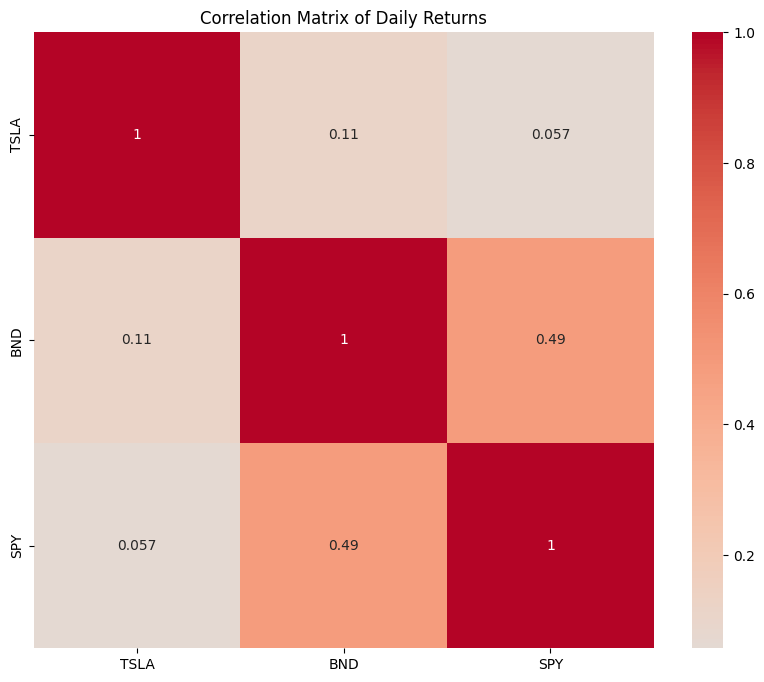

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# Fetch historical data
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-07-01'
end_date = '2025-07-31'

# Download all data
data = yf.download(tickers, start=start_date, end=end_date)

# Extract closing prices (handles MultiIndex properly)
closing_prices = data['Close'].copy() if isinstance(data.columns, pd.MultiIndex) else data[[f'{t}.Close' for t in tickers]].copy()
closing_prices.columns = tickers  # Standardize column names

# Calculate daily returns
returns = closing_prices.pct_change().dropna()

# Stationarity tests
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)

print("\nStationarity test for TSLA closing prices:")
test_stationarity(closing_prices['TSLA'].dropna())

print("\nStationarity test for TSLA returns:")
test_stationarity(returns['TSLA'].dropna())

# Calculate risk metrics
def calculate_risk_metrics(returns_df):
    metrics = {}
    for ticker in returns_df.columns:
        ret = returns_df[ticker]
        metrics[ticker] = {
            'Annual Return': ret.mean() * 252,
            'Annual Volatility': ret.std() * np.sqrt(252),
            'Sharpe Ratio': ret.mean() / ret.std() * np.sqrt(252),
            'VaR (95%)': np.percentile(ret, 5)
        }
    return pd.DataFrame(metrics).T

risk_metrics = calculate_risk_metrics(returns)
print("\nRisk Metrics:")
print(risk_metrics)

# Outlier detection
def detect_outliers(returns_df, threshold=3):
    outliers = {}
    for ticker in returns_df.columns:
        z_scores = (returns_df[ticker] - returns_df[ticker].mean()) / returns_df[ticker].std()
        outliers[ticker] = returns_df[ticker][abs(z_scores) > threshold]
    return outliers

outliers = detect_outliers(returns)
print("\nOutliers in returns:")
for ticker, outlier_data in outliers.items():
    print(f"\n{ticker}:")
    print(outlier_data)

# Correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Daily Returns')
plt.show()

## Task 2: Develop Time Series Forecasting Models

# # ARIMA/SARIMA Implementation

In [4]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prepare TSLA data
tsla = closing_prices['TSLA'].dropna()
train_size = int(len(tsla) * 0.8)
train, test = tsla[:train_size], tsla[train_size:]

# Auto ARIMA to find best parameters
auto_model = auto_arima(train, seasonal=False, trace=True,
                       error_action='ignore', suppress_warnings=True,
                       stepwise=True)

# Fit ARIMA model
arima_model = ARIMA(train, order=auto_model.order)
arima_fit = arima_model.fit()

# Forecast
arima_forecast = arima_fit.get_forecast(steps=len(test))
arima_pred = arima_forecast.predicted_mean

# Evaluate
arima_mae = mean_absolute_error(test, arima_pred)
arima_rmse = np.sqrt(mean_squared_error(test, arima_pred))

c:\Users\gagur\Videos\Time_series_forecasting_for_portfolio\env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\gagur\Videos\Time_series_forecasting_for_portfolio\env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\gagur\Videos\Time_series_forecasting_for_portfolio\env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\gagur\Videos\Time_series_forecasting_for_portfolio\env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\gagur\Videos\Time_series_forecasting_for_po

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-147.530, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-100.475, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-98.525, Time=0.06 sec


c:\Users\gagur\Videos\Time_series_forecasting_for_portfolio\env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\gagur\Videos\Time_series_forecasting_for_portfolio\env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\gagur\Videos\Time_series_forecasting_for_portfolio\env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-98.539, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-102.098, Time=0.05 sec


c:\Users\gagur\Videos\Time_series_forecasting_for_portfolio\env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\gagur\Videos\Time_series_forecasting_for_portfolio\env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-120.016, Time=0.56 sec


c:\Users\gagur\Videos\Time_series_forecasting_for_portfolio\env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-123.382, Time=0.39 sec


c:\Users\gagur\Videos\Time_series_forecasting_for_portfolio\env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-145.876, Time=1.24 sec


c:\Users\gagur\Videos\Time_series_forecasting_for_portfolio\env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-145.894, Time=1.34 sec


c:\Users\gagur\Videos\Time_series_forecasting_for_portfolio\env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-102.511, Time=0.37 sec


c:\Users\gagur\Videos\Time_series_forecasting_for_portfolio\env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-119.821, Time=0.76 sec


c:\Users\gagur\Videos\Time_series_forecasting_for_portfolio\env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-124.124, Time=0.50 sec


c:\Users\gagur\Videos\Time_series_forecasting_for_portfolio\env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-143.924, Time=1.65 sec


c:\Users\gagur\Videos\Time_series_forecasting_for_portfolio\env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-149.080, Time=0.34 sec


c:\Users\gagur\Videos\Time_series_forecasting_for_portfolio\env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-121.525, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-124.886, Time=0.18 sec


c:\Users\gagur\Videos\Time_series_forecasting_for_portfolio\env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\gagur\Videos\Time_series_forecasting_for_portfolio\env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0]             : AIC=-147.416, Time=0.59 sec


c:\Users\gagur\Videos\Time_series_forecasting_for_portfolio\env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0]             : AIC=-147.433, Time=0.91 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-104.027, Time=0.14 sec


c:\Users\gagur\Videos\Time_series_forecasting_for_portfolio\env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\gagur\Videos\Time_series_forecasting_for_portfolio\env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0]             : AIC=-121.323, Time=0.53 sec


c:\Users\gagur\Videos\Time_series_forecasting_for_portfolio\env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0]             : AIC=-125.617, Time=0.31 sec


c:\Users\gagur\Videos\Time_series_forecasting_for_portfolio\env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0]             : AIC=-145.363, Time=0.79 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0]          
Total fit time: 12.030 seconds


c:\Users\gagur\Videos\Time_series_forecasting_for_portfolio\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gagur\Videos\Time_series_forecasting_for_portfolio\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gagur\Videos\Time_series_forecasting_for_portfolio\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gagur\Videos\Time_series_forecasting_for_portfolio\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: Val

# LSTM Implementation

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Prepare data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(tsla.values.reshape(-1, 1))

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length-1):
        X.append(data[i:(i+seq_length), 0])
        y.append(data[i+seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Split train/test
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train
history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                   validation_data=(X_test, y_test))

# Predict
lstm_pred = model.predict(X_test)
lstm_pred = scaler.inverse_transform(lstm_pred).flatten()

# Evaluate
lstm_mae = mean_absolute_error(test[seq_length+1:], lstm_pred)
lstm_rmse = np.sqrt(mean_squared_error(test[seq_length+1:], lstm_pred))

c:\Users\gagur\Videos\Time_series_forecasting_for_portfolio\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0273 - val_loss: 0.0017
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 9.3554e-04 - val_loss: 0.0010
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 9.0808e-04 - val_loss: 9.7605e-04
Epoch 9/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 8.5324e-04 - val_loss: 0.0011
Epoch 10/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 8.0821e-04 - val_loss: 9.3819e-04
Epoch 11/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 8.5301e-04 - val_loss: 8.2301e-04
Epoch 12/20
64/64 ━━━━━━━━━━━━━

## Task 3: Forecast Future Market Trends

# 12-Month Forecast

c:\Users\gagur\Videos\Time_series_forecasting_for_portfolio\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gagur\Videos\Time_series_forecasting_for_portfolio\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gagur\Videos\Time_series_forecasting_for_portfolio\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gagur\Videos\Time_series_forecasting_for_portfolio\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: Val

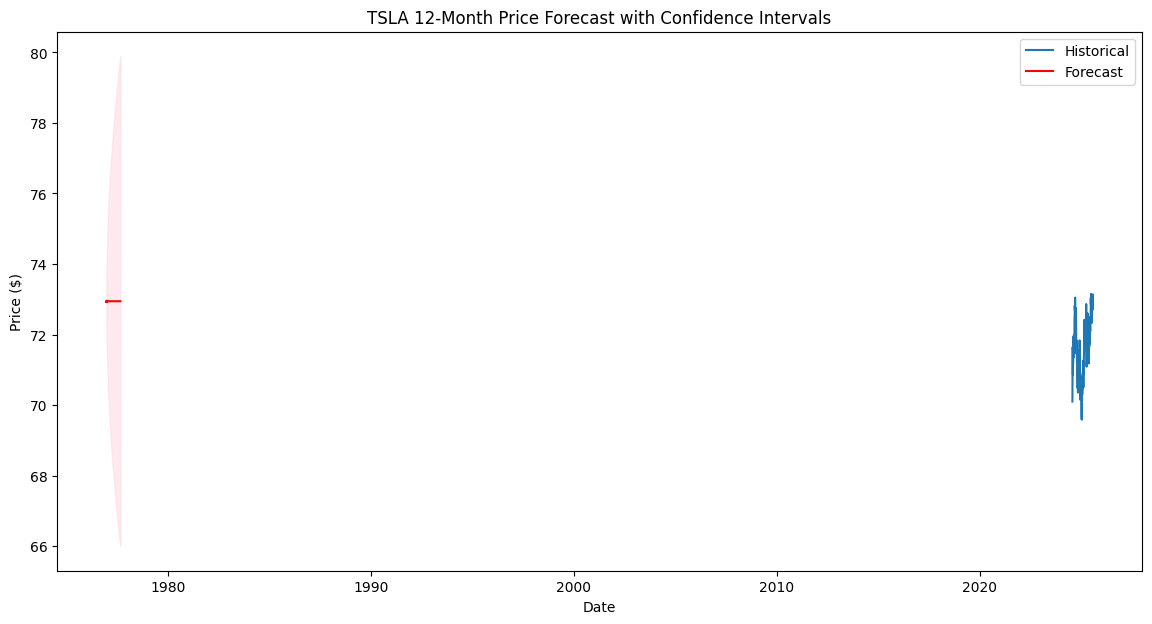

In [6]:
# Generate 12-month forecast with ARIMA
final_model = ARIMA(tsla, order=auto_model.order)
final_fit = final_model.fit()
forecast = final_fit.get_forecast(steps=252)  # 1 year trading days
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot
plt.figure(figsize=(14, 7))
plt.plot(tsla.index[-252:], tsla.values[-252:], label='Historical')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(conf_int.index,
                conf_int.iloc[:, 0],
                conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('TSLA 12-Month Price Forecast with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

## Task 4: Portfolio Optimization

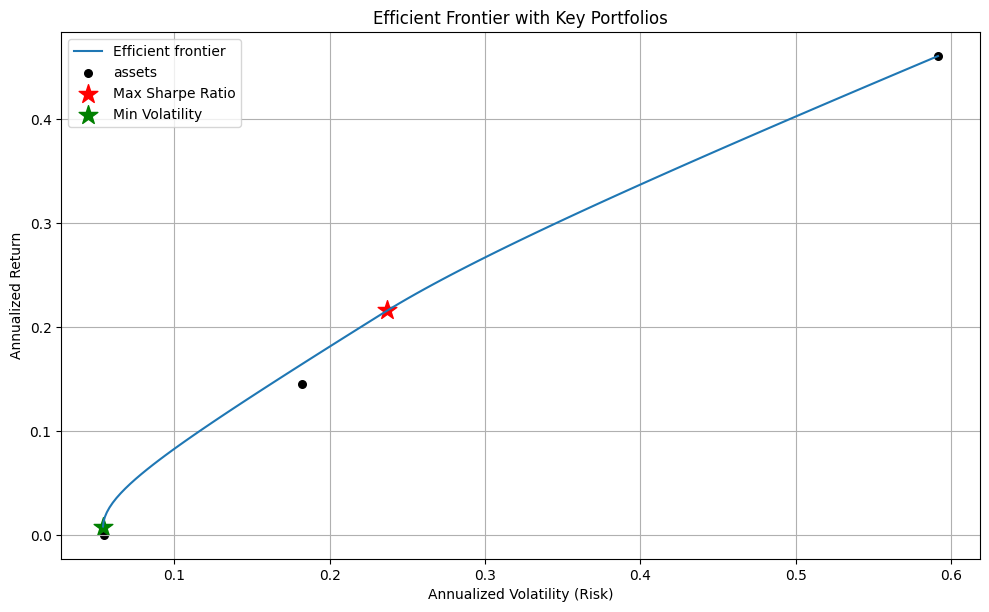


Optimal Portfolio Allocation:
TSLA: 0.0%
BND: 77.5%
SPY: 22.5%

Expected Annual Return: 21.6%
Annual Volatility: 23.7%
Sharpe Ratio: 0.91


In [11]:
from pypfopt import EfficientFrontier, risk_models, expected_returns
from pypfopt import plotting
import matplotlib.pyplot as plt

# Calculate expected returns - using forecast for TSLA, historical for others
mu = {
    'TSLA': forecast_mean.pct_change().mean() * 252,  # Annualized forecast return
    'BND': returns['BND'].mean() * 252,              # Historical annualized
    'SPY': returns['SPY'].mean() * 252               # Historical annualized
}
mu = pd.Series(mu)

# Calculate covariance matrix (annualized)
cov_matrix = returns.cov() * 252

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot efficient frontier - create new instance just for plotting
ef_plot = EfficientFrontier(mu, cov_matrix)
plotting.plot_efficient_frontier(ef_plot, ax=ax, show_assets=True)

# Find optimal portfolios using fresh instances each time
# 1. Max Sharpe Ratio (Tangency Portfolio)
ef_sharpe = EfficientFrontier(mu, cov_matrix)
ef_sharpe.max_sharpe()
ret_tangent, std_tangent, _ = ef_sharpe.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker='*', s=200, c='r', label='Max Sharpe Ratio')

# 2. Minimum Volatility Portfolio
ef_minvol = EfficientFrontier(mu, cov_matrix)
ef_minvol.min_volatility()
ret_min_vol, std_min_vol, _ = ef_minvol.portfolio_performance()
ax.scatter(std_min_vol, ret_min_vol, marker='*', s=200, c='g', label='Min Volatility')

# Formatting
ax.set_title('Efficient Frontier with Key Portfolios')
ax.set_xlabel('Annualized Volatility (Risk)')
ax.set_ylabel('Annualized Return')
ax.legend()
plt.grid(True)
plt.show()

# Get optimal weights (using max Sharpe)
optimal_weights = ef_sharpe.clean_weights()

# Print portfolio allocation
print("\nOptimal Portfolio Allocation:")
for ticker, weight in optimal_weights.items():
    print(f"{ticker}: {weight*100:.1f}%")

# Print performance metrics
expected_return, annual_volatility, sharpe_ratio = ef_sharpe.portfolio_performance()
print(f"\nExpected Annual Return: {expected_return*100:.1f}%")
print(f"Annual Volatility: {annual_volatility*100:.1f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

## Task 5: Strategy Backtesting

C:\Users\gagur\AppData\Local\Temp\ipykernel_25768\3506927007.py:2: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  backtest_data = closing_prices.last('1Y')
C:\Users\gagur\AppData\Local\Temp\ipykernel_25768\3506927007.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  backtest_data = closing_prices.last('1Y')


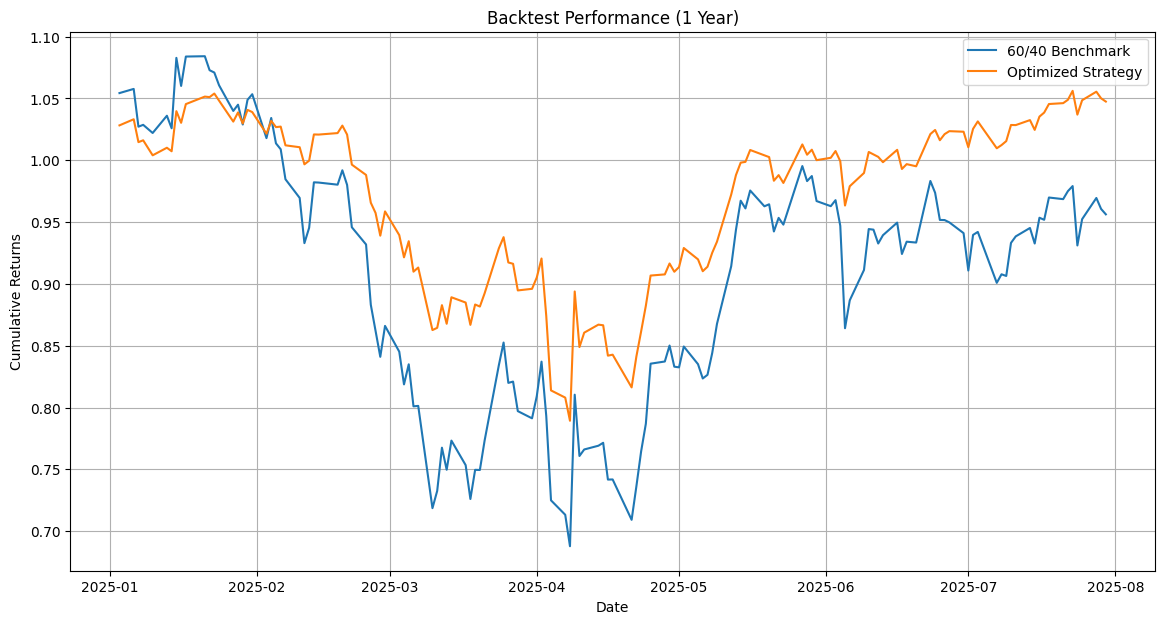

Benchmark Sharpe: 0.10
Strategy Sharpe: 0.41
Benchmark Total Return: -4.4%
Strategy Total Return: 4.7%


C:\Users\gagur\AppData\Local\Temp\ipykernel_25768\3506927007.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Benchmark Total Return: {(cum_benchmark[-1]-1)*100:.1f}%")
C:\Users\gagur\AppData\Local\Temp\ipykernel_25768\3506927007.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Strategy Total Return: {(cum_strategy[-1]-1)*100:.1f}%")


In [12]:
# Backtesting period (last year)
backtest_data = closing_prices.last('1Y')
backtest_returns = backtest_data.pct_change().dropna()

# Benchmark (60% SPY, 40% BND)
benchmark_weights = {'SPY': 0.6, 'BND': 0.4, 'TSLA': 0}
benchmark_returns = (backtest_returns * pd.Series(benchmark_weights)).sum(axis=1)

# Strategy portfolio (from optimization)
strategy_returns = (backtest_returns * pd.Series(cleaned_weights)).sum(axis=1)

# Cumulative returns
cum_benchmark = (1 + benchmark_returns).cumprod()
cum_strategy = (1 + strategy_returns).cumprod()

# Plot
plt.figure(figsize=(14, 7))
plt.plot(cum_benchmark, label='60/40 Benchmark')
plt.plot(cum_strategy, label='Optimized Strategy')
plt.title('Backtest Performance (1 Year)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

# Performance metrics
def annualized_sharpe(returns):
    return returns.mean() / returns.std() * np.sqrt(252)

print(f"Benchmark Sharpe: {annualized_sharpe(benchmark_returns):.2f}")
print(f"Strategy Sharpe: {annualized_sharpe(strategy_returns):.2f}")
print(f"Benchmark Total Return: {(cum_benchmark[-1]-1)*100:.1f}%")
print(f"Strategy Total Return: {(cum_strategy[-1]-1)*100:.1f}%")